# Exploratory Data Analysis (EDA) for Diabetes Clustering Project

**Author**: Novan  
**Date**: December 2024  
**Purpose**: Comprehensive EDA on the Diabetes 130-US Hospitals dataset

---

## Notebook Overview

This notebook performs:
1. Data loading and basic exploration
2. Missing value analysis
3. Numerical features distribution
4. Categorical features analysis
5. Target variable (readmission) analysis
6. Correlation analysis
7. Feature relationships with target
8. Summary statistics and insights

## 1. Setup and Imports

In [40]:
# Cell 1: Setup
"""
Exploratory Data Analysis (EDA) for Diabetes Clustering Project
Author: Novan
Date: 2024

This notebook performs comprehensive EDA on the Diabetes 130-US Hospitals dataset
"""

# Standard imports
import sys
import os
from pathlib import Path

# Get project root directory
notebook_dir = Path.cwd()
if notebook_dir.name == 'notebooks':
    project_root = notebook_dir.parent
else:
    project_root = notebook_dir

# Add to path and change directory
sys.path.insert(0, str(project_root))
os.chdir(project_root)

print(f"📁 Project root: {project_root}")
print(f"📁 Current directory: {Path.cwd()}")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

warnings.filterwarnings('ignore')

# Custom imports
from src.data.data_loader import DiabetesDataLoader, set_random_seed, load_config
from src.utils.mlflow_utils import MLflowManager

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_context("paper")
sns.set_palette("husl")

# Set random seed for reproducibility
set_random_seed(42)

# Load configuration
config = load_config('config/config.yaml')

# Create ALL necessary directories
directories = [
    'reports/figures',
    'reports/results',
    'data/processed',
    'models/saved_models',
    'experiments/mlruns'
]

for dir_path in directories:
    Path(dir_path).mkdir(parents=True, exist_ok=True)
    print(f"✅ Directory ready: {dir_path}")

print("\n✅ Setup complete!")
print(f"Python version: {sys.version.split()[0]}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


INFO:src.data.data_loader:Random seed set to 42


📁 Project root: /Users/rzkynovan/datsci/diabetes_clustering
📁 Current directory: /Users/rzkynovan/datsci/diabetes_clustering
✅ Directory ready: reports/figures
✅ Directory ready: reports/results
✅ Directory ready: data/processed
✅ Directory ready: models/saved_models
✅ Directory ready: experiments/mlruns

✅ Setup complete!
Python version: 3.10.0
Pandas version: 2.0.3
NumPy version: 1.24.3
Matplotlib version: 3.7.2


## 2. Load Dataset

In [41]:
# Initialize data loader
loader = DiabetesDataLoader()

# Load dataset (will download if not exists)
print("Loading dataset...")
df = loader.load_raw_data()

# Display basic information
print(f"\n{'='*70}")
print("DATASET LOADED SUCCESSFULLY")
print(f"{'='*70}")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

INFO:src.data.data_loader:Loading dataset from data/raw/diabetic_data.csv


Loading dataset...


INFO:src.data.data_loader:Dataset loaded successfully with utf-8 encoding
INFO:src.data.data_loader:Dataset loaded: 101766 rows, 50 columns



DATASET LOADED SUCCESSFULLY
Shape: 101,766 rows × 50 columns
Memory Usage: 220.22 MB


In [42]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [43]:
# Display column names and types
print("\nColumn Information:")
df.info()


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-n

## 3. Dataset Overview

In [44]:
# Get comprehensive dataset information
info = loader.get_data_info(df)

print(f"{'='*70}")
print("COMPREHENSIVE DATASET INFORMATION")
print(f"{'='*70}")

print(f"\n📊 Shape: {info['shape'][0]:,} rows × {info['shape'][1]} columns")
print(f"💾 Memory Usage: {info['memory_usage']:.2f} MB")
print(f"🔄 Duplicate Rows: {info['duplicates']:,}")

print(f"\n📈 Column Types:")
print(f"  - Categorical: {len(info['categorical_columns'])}")
print(f"  - Numerical: {len(info['numerical_columns'])}")

print(f"\n❌ Missing Values Summary:")
missing_cols = {k: v for k, v in info['missing_percentage'].items() if v > 0}
if missing_cols:
    for col, pct in sorted(missing_cols.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"  {col:30s}: {pct:6.2f}%")
else:
    print("  No missing values!")

print(f"\n🏷️  High Cardinality Categorical Columns:")
high_card = {k: v for k, v in info['unique_values'].items() if v > 10}
for col, n_unique in sorted(high_card.items(), key=lambda x: x[1], reverse=True):
    print(f"  {col:30s}: {n_unique:,} unique values")

COMPREHENSIVE DATASET INFORMATION

📊 Shape: 101,766 rows × 50 columns
💾 Memory Usage: 220.22 MB
🔄 Duplicate Rows: 0

📈 Column Types:
  - Categorical: 37
  - Numerical: 13

❌ Missing Values Summary:
  max_glu_serum                 :  94.75%
  A1Cresult                     :  83.28%

🏷️  High Cardinality Categorical Columns:
  diag_3                        : 790 unique values
  diag_2                        : 749 unique values
  diag_1                        : 717 unique values
  medical_specialty             : 73 unique values
  payer_code                    : 18 unique values


## 4. Target Variable Analysis (Readmission)

In [45]:
# Analyze readmission rates
target_col = config['data']['target_column']

print(f"Target Variable: {target_col}")
print("\nDistribution (Count):")
print(df[target_col].value_counts())
print("\nDistribution (Percentage):")
print(df[target_col].value_counts(normalize=True) * 100)

Target Variable: readmitted

Distribution (Count):
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Distribution (Percentage):
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


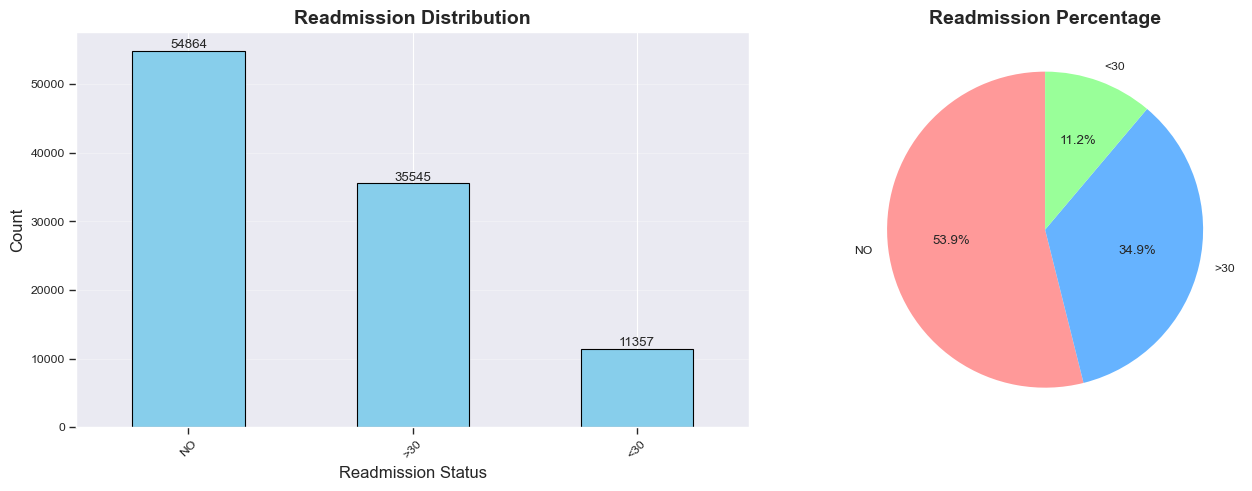

✅ Figure saved: reports/figures/target_distribution.png


In [46]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Readmission Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Readmission Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Pie chart
colors = ['#ff9999','#66b3ff','#99ff99']
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                    colors=colors, startangle=90)
axes[1].set_title('Readmission Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('reports/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure saved: reports/figures/target_distribution.png")

## 5. Missing Values Analysis

In [47]:
# Calculate missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print(f"Total columns with missing values: {len(missing_data)}")
print(f"\nMissing values summary:")
print(missing_data)

print(f"\nMissing percentage:")
missing_pct = (missing_data / len(df) * 100)
print(missing_pct)

Total columns with missing values: 2

Missing values summary:
max_glu_serum    96420
A1Cresult        84748
dtype: int64

Missing percentage:
max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64


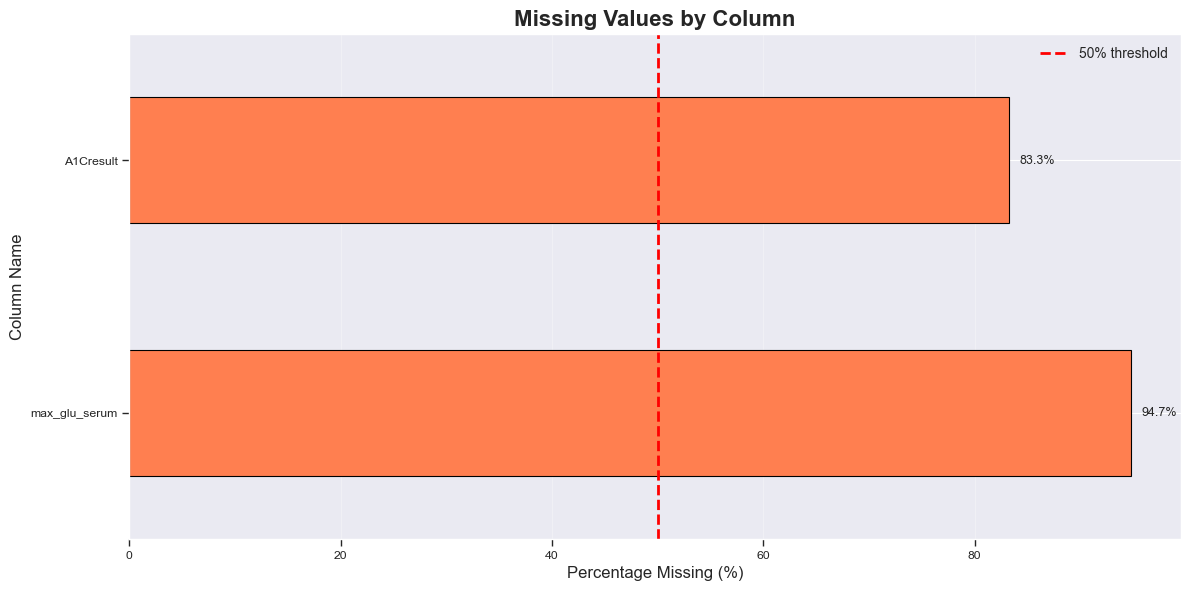

✅ Figure saved: reports/figures/missing_values.png


In [48]:
# Visualize missing values
if len(missing_data) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    missing_pct = (missing_data / len(df) * 100)
    missing_pct.plot(kind='barh', ax=ax, color='coral', edgecolor='black')
    
    ax.set_title('Missing Values by Column', fontsize=16, fontweight='bold')
    ax.set_xlabel('Percentage Missing (%)', fontsize=12)
    ax.set_ylabel('Column Name', fontsize=12)
    ax.axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% threshold')
    ax.legend(fontsize=10)
    ax.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, v in enumerate(missing_pct):
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('reports/figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Figure saved: reports/figures/missing_values.png")
else:
    print("✨ No missing values in the dataset!")

## 6. Numerical Features Analysis

In [49]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID columns
numerical_cols = [col for col in numerical_cols if 'id' not in col.lower()]

print(f"Numerical Features ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

Numerical Features (9):
   1. patient_nbr
   2. time_in_hospital
   3. num_lab_procedures
   4. num_procedures
   5. num_medications
   6. number_outpatient
   7. number_emergency
   8. number_inpatient
   9. number_diagnoses


In [50]:
# Statistical summary
print("\nStatistical Summary of Numerical Features:")
df[numerical_cols].describe().T


Statistical Summary of Numerical Features:


,count,mean,std,min,25%,50%,75%,max
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,87545949.75,189502619.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,57.00,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,20.00,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.00,42.0
number_emergency,101766.0,1.978362e-01,9.304723e-01,0.0,0.0,0.0,0.00,76.0
number_inpatient,101766.0,6.355659e-01,1.262863e+00,0.0,0.0,0.0,1.00,21.0
number_diagnoses,101766.0,7.422607e+00,1.933600e+00,1.0,6.0,8.0,9.00,16.0


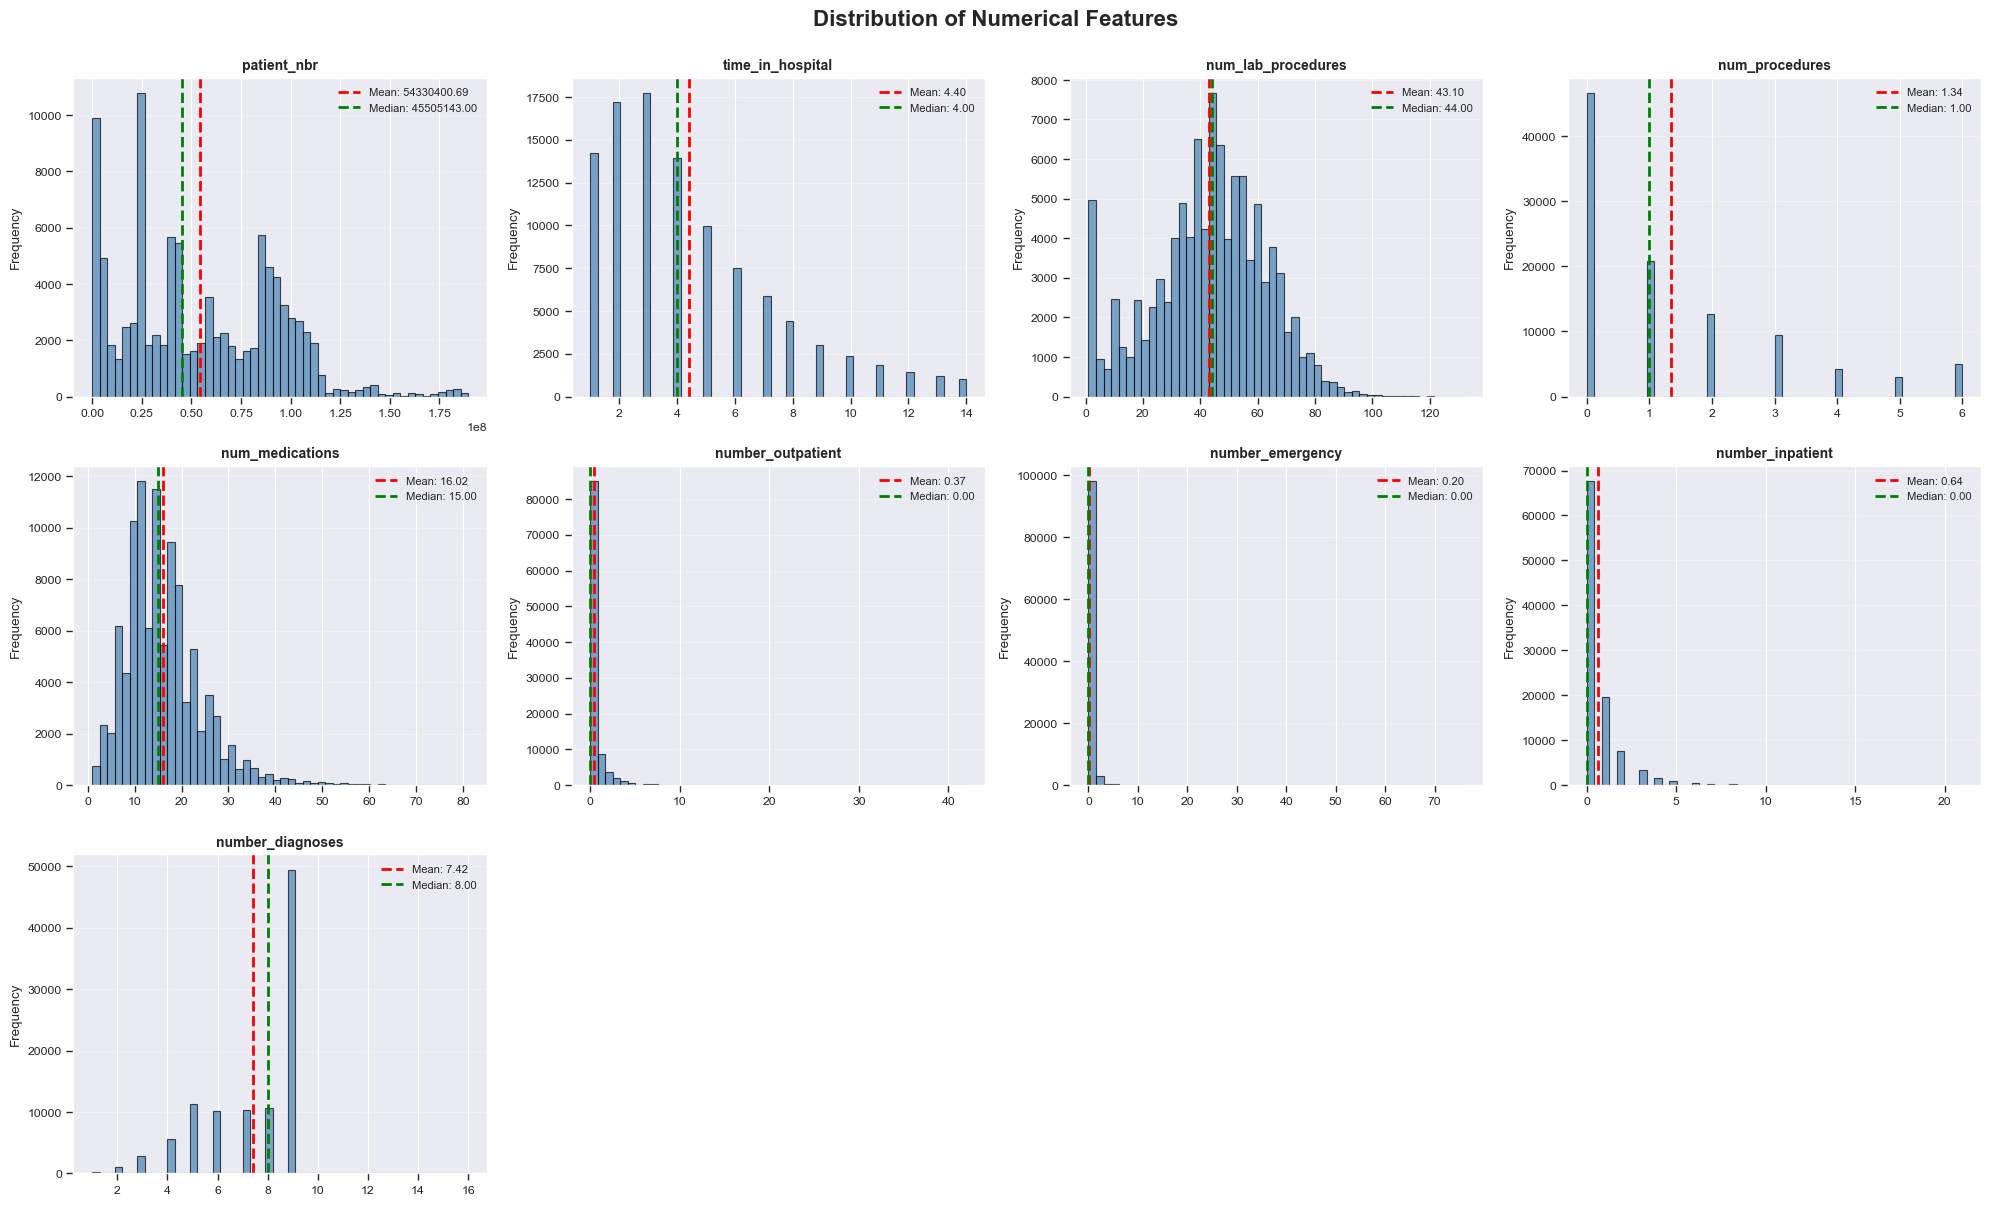

✅ Figure saved: reports/figures/numerical_distributions.png


In [51]:
# Plot distributions of numerical features
n_cols = 4
n_features = min(16, len(numerical_cols))  # Plot first 16 features
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:n_features]):
    ax = axes[idx]
    
    # Histogram
    df[col].hist(bins=50, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=8)
    ax.grid(axis='y', alpha=0.3)

# Hide empty subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('reports/figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure saved: reports/figures/numerical_distributions.png")

## 7. Correlation Analysis

In [52]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

print("Correlation Matrix computed successfully")
print(f"Shape: {corr_matrix.shape}")

Correlation Matrix computed successfully
Shape: (9, 9)


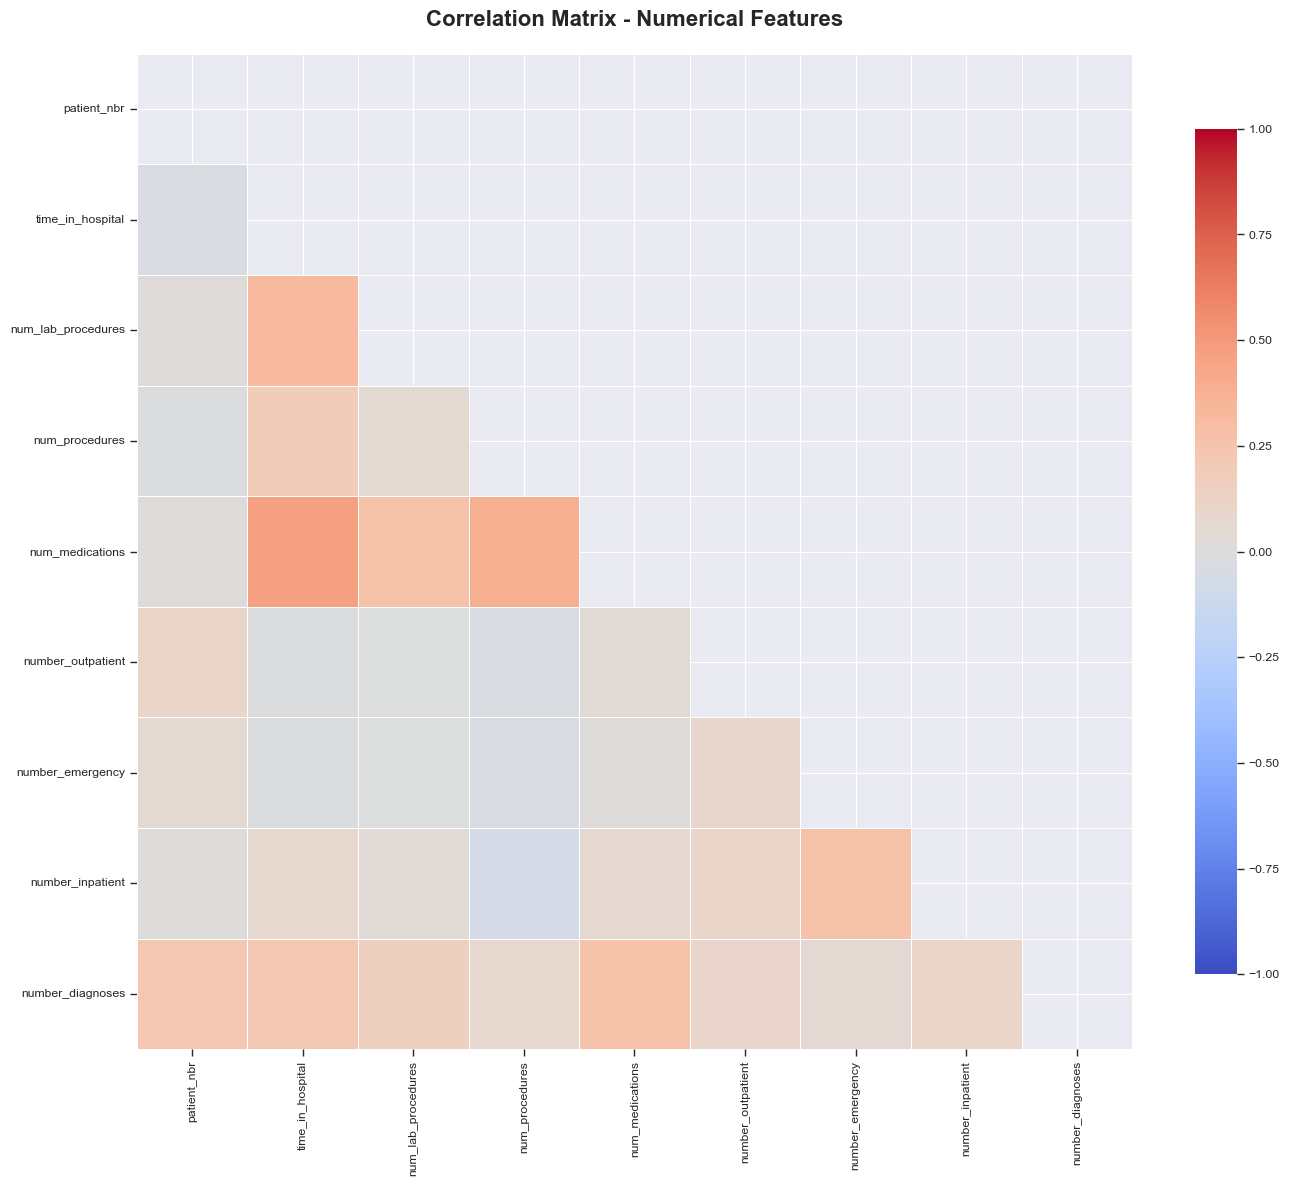

✅ Figure saved: reports/figures/correlation_matrix.png


In [53]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Figure saved: reports/figures/correlation_matrix.png")

In [54]:
# Find highly correlated pairs
print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
print(f"{'Feature 1':<30s} {'Feature 2':<30s} {'Correlation':>12s}")
print("="*75)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            pair = {
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            }
            high_corr_pairs.append(pair)
            print(f"{pair['feature1']:<30s} {pair['feature2']:<30s} {pair['correlation']:>12.3f}")

if len(high_corr_pairs) == 0:
    print("No highly correlated pairs found (|r| > 0.7)")


Highly Correlated Feature Pairs (|r| > 0.7):
Feature 1                      Feature 2                       Correlation
No highly correlated pairs found (|r| > 0.7)


## 8. Categorical Features Analysis

In [55]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove patient ID if exists
patient_id_col = config['data']['patient_id']
if patient_id_col in categorical_cols:
    categorical_cols.remove(patient_id_col)

print(f"Categorical Features ({len(categorical_cols)}):")
print(f"\n{'Feature':<30s} {'Unique Values':>15s} {'Cardinality':>15s}")
print("="*65)

for col in categorical_cols:
    n_unique = df[col].nunique()
    cardinality = "Low" if n_unique <= 10 else "Medium" if n_unique <= 50 else "High"
    print(f"{col:<30s} {n_unique:>15d} {cardinality:>15s}")

Categorical Features (37):

Feature                          Unique Values     Cardinality
race                                         6             Low
gender                                       3             Low
age                                         10             Low
weight                                      10             Low
payer_code                                  18          Medium
medical_specialty                           73            High
diag_1                                     717            High
diag_2                                     749            High
diag_3                                     790            High
max_glu_serum                                3             Low
A1Cresult                                    3             Low
metformin                                    4             Low
repaglinide                                  4             Low
nateglinide                                  4             Low
chlorpropamide             

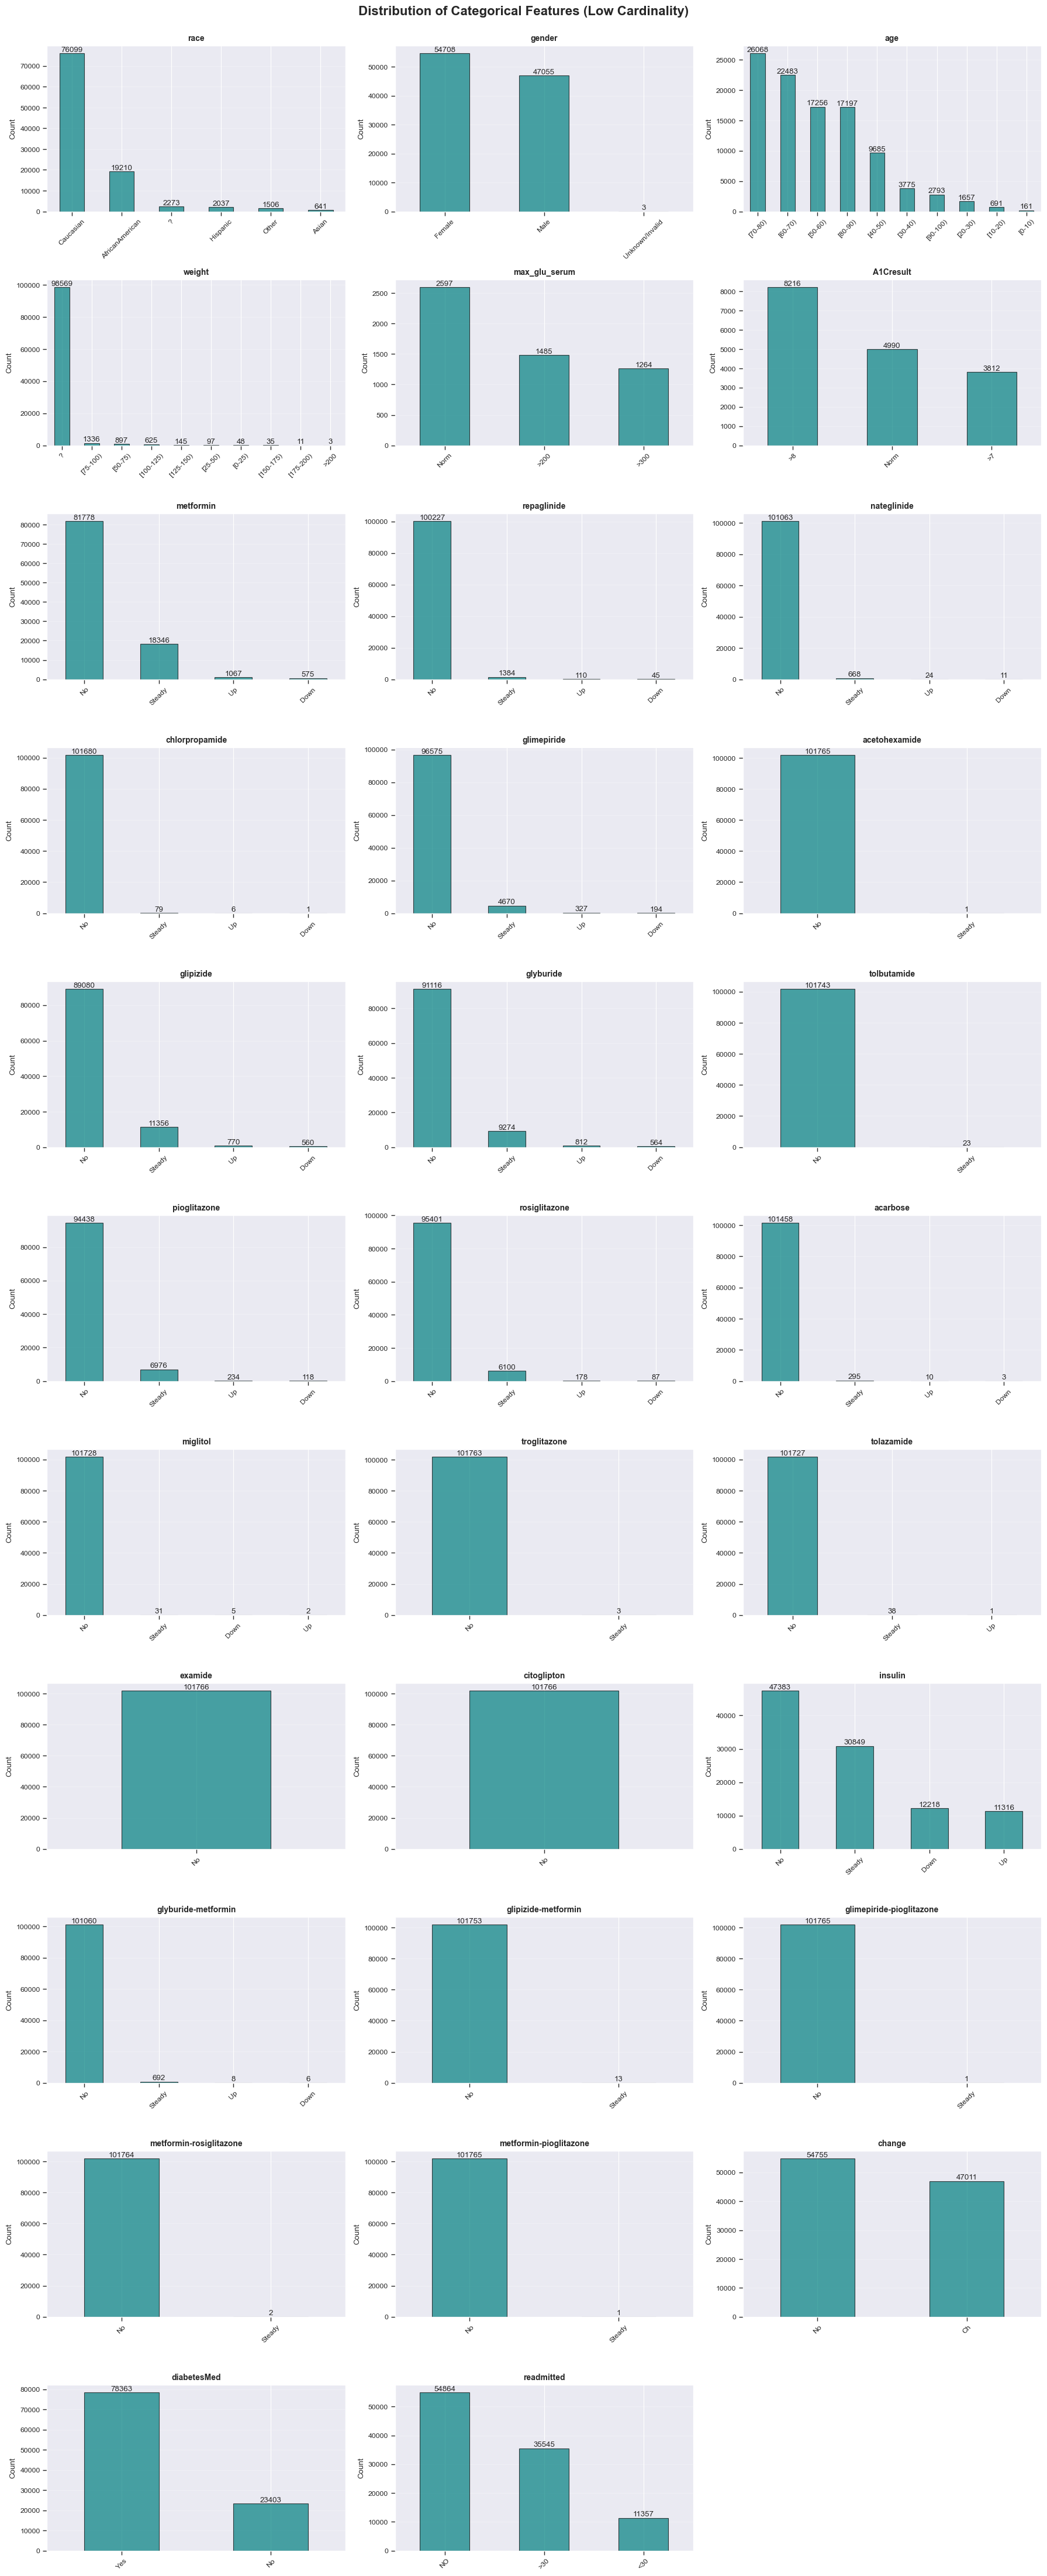

✅ Figure saved: reports/figures/categorical_distributions.png


In [56]:
# Plot distributions for low cardinality categoricals
low_card_cols = [col for col in categorical_cols if df[col].nunique() <= 10]

if len(low_card_cols) > 0:
    n_cols = 3
    n_rows = int(np.ceil(len(low_card_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(low_card_cols):
        ax = axes[idx]
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black', alpha=0.7)
        ax.set_title(f'{col}', fontsize=10, fontweight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels
        for container in ax.containers:
            ax.bar_label(container, fmt='%d')

    # Hide empty subplots
    for idx in range(len(low_card_cols), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Distribution of Categorical Features (Low Cardinality)', 
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('reports/figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Figure saved: reports/figures/categorical_distributions.png")
else:
    print("No low cardinality categorical features found")

## 9. Age Distribution Analysis

In [57]:
# Analyze age distribution
if 'age' in df.columns:
    print("Age Distribution:")
    age_dist = df['age'].value_counts().sort_index()
    print(age_dist)
    
    # Calculate statistics
    print(f"\nMost common age group: {df['age'].mode()[0]}")
    print(f"Number of age groups: {df['age'].nunique()}")

Age Distribution:
age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: count, dtype: int64

Most common age group: [70-80)
Number of age groups: 10


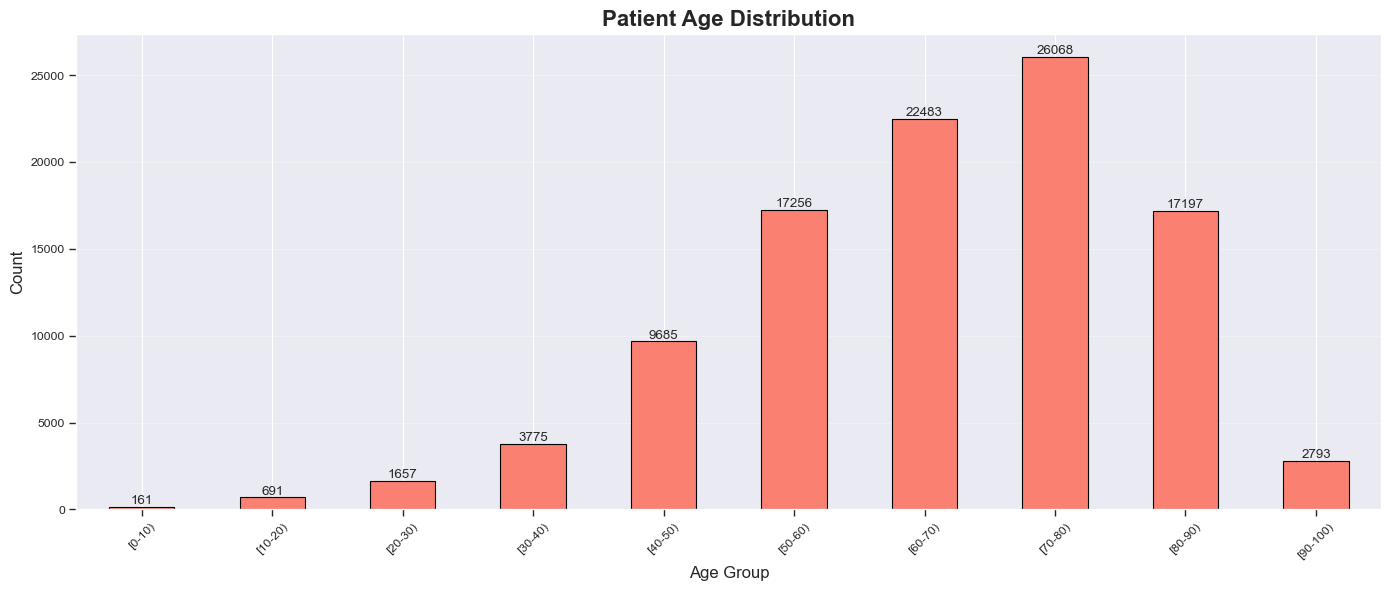

✅ Figure saved: reports/figures/age_distribution.png


In [58]:
# Visualize age distribution
if 'age' in df.columns:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    age_counts = df['age'].value_counts().sort_index()
    age_counts.plot(kind='bar', ax=ax, color='salmon', edgecolor='black')
    
    ax.set_title('Patient Age Distribution', fontsize=16, fontweight='bold')
    ax.set_xlabel('Age Group', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    
    plt.tight_layout()
    plt.savefig('reports/figures/age_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Figure saved: reports/figures/age_distribution.png")

## 10. Medication Analysis

In [59]:
# Identify medication columns
drug_keywords = ['metformin', 'insulin', 'glyburide', 'glipizide', 'glimepiride', 
                 'pioglitazone', 'rosiglitazone', 'repaglinide', 'nateglinide', 
                 'chlorpropamide', 'tolbutamide', 'acarbose']

medication_cols = [col for col in df.columns if any(drug in col.lower() for drug in drug_keywords)]

print(f"Medication Columns ({len(medication_cols)}):")
for i, col in enumerate(medication_cols, 1):
    print(f"  {i:2d}. {col}")

Medication Columns (17):
   1. metformin
   2. repaglinide
   3. nateglinide
   4. chlorpropamide
   5. glimepiride
   6. glipizide
   7. glyburide
   8. tolbutamide
   9. pioglitazone
  10. rosiglitazone
  11. acarbose
  12. insulin
  13. glyburide-metformin
  14. glipizide-metformin
  15. glimepiride-pioglitazone
  16. metformin-rosiglitazone
  17. metformin-pioglitazone


In [60]:
# Analyze medication change and diabetes medication
if 'change' in df.columns:
    print("\nMedication Change Distribution:")
    print(df['change'].value_counts())
    print(f"\nPercentage:")
    print(df['change'].value_counts(normalize=True) * 100)

if 'diabetesMed' in df.columns:
    print("\nDiabetes Medication Prescribed:")
    print(df['diabetesMed'].value_counts())
    print(f"\nPercentage:")
    print(df['diabetesMed'].value_counts(normalize=True) * 100)


Medication Change Distribution:
change
No    54755
Ch    47011
Name: count, dtype: int64

Percentage:
change
No    53.804807
Ch    46.195193
Name: proportion, dtype: float64

Diabetes Medication Prescribed:
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64

Percentage:
diabetesMed
Yes    77.003125
No     22.996875
Name: proportion, dtype: float64


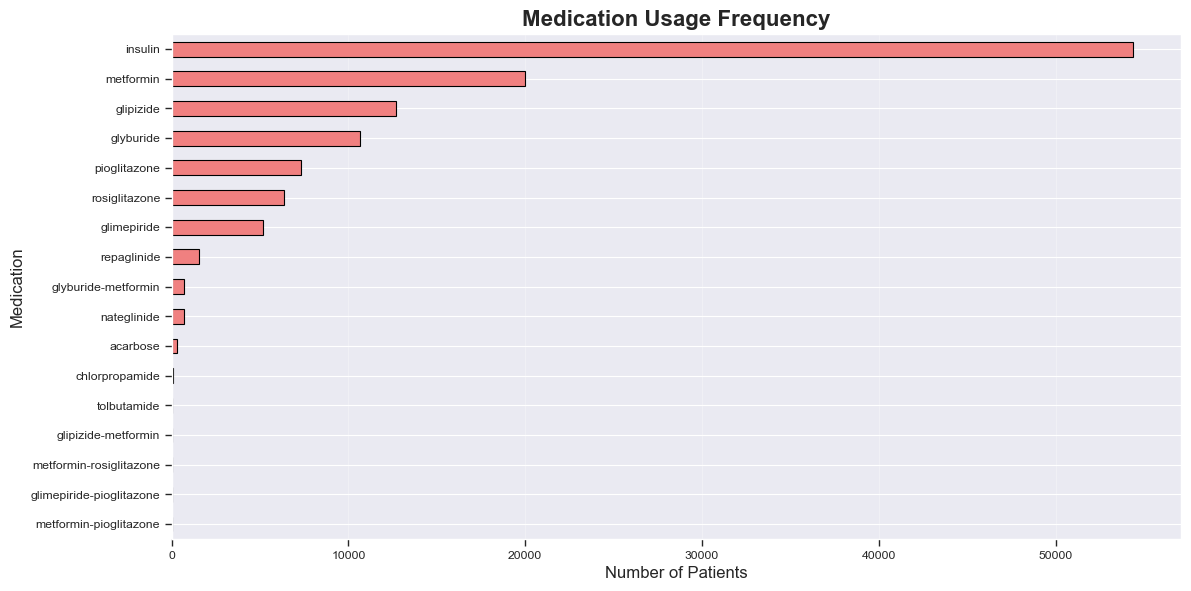

✅ Figure saved: reports/figures/medication_usage.png


In [61]:
# Visualize medication usage patterns
if len(medication_cols) > 0:
    # Count how many medications each patient is on
    # Assuming medication columns have values like 'No', 'Steady', 'Up', 'Down'
    
    medication_usage = {}
    for col in medication_cols:
        if df[col].dtype == 'object':
            # Count patients with any medication change (not 'No')
            usage = (df[col] != 'No').sum()
            medication_usage[col] = usage
    
    if medication_usage:
        fig, ax = plt.subplots(figsize=(12, 6))
        
        usage_series = pd.Series(medication_usage).sort_values(ascending=True)
        usage_series.plot(kind='barh', ax=ax, color='lightcoral', edgecolor='black')
        
        ax.set_title('Medication Usage Frequency', fontsize=16, fontweight='bold')
        ax.set_xlabel('Number of Patients', fontsize=12)
        ax.set_ylabel('Medication', fontsize=12)
        ax.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('reports/figures/medication_usage.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Figure saved: reports/figures/medication_usage.png")

## 11. Readmission Analysis by Key Features

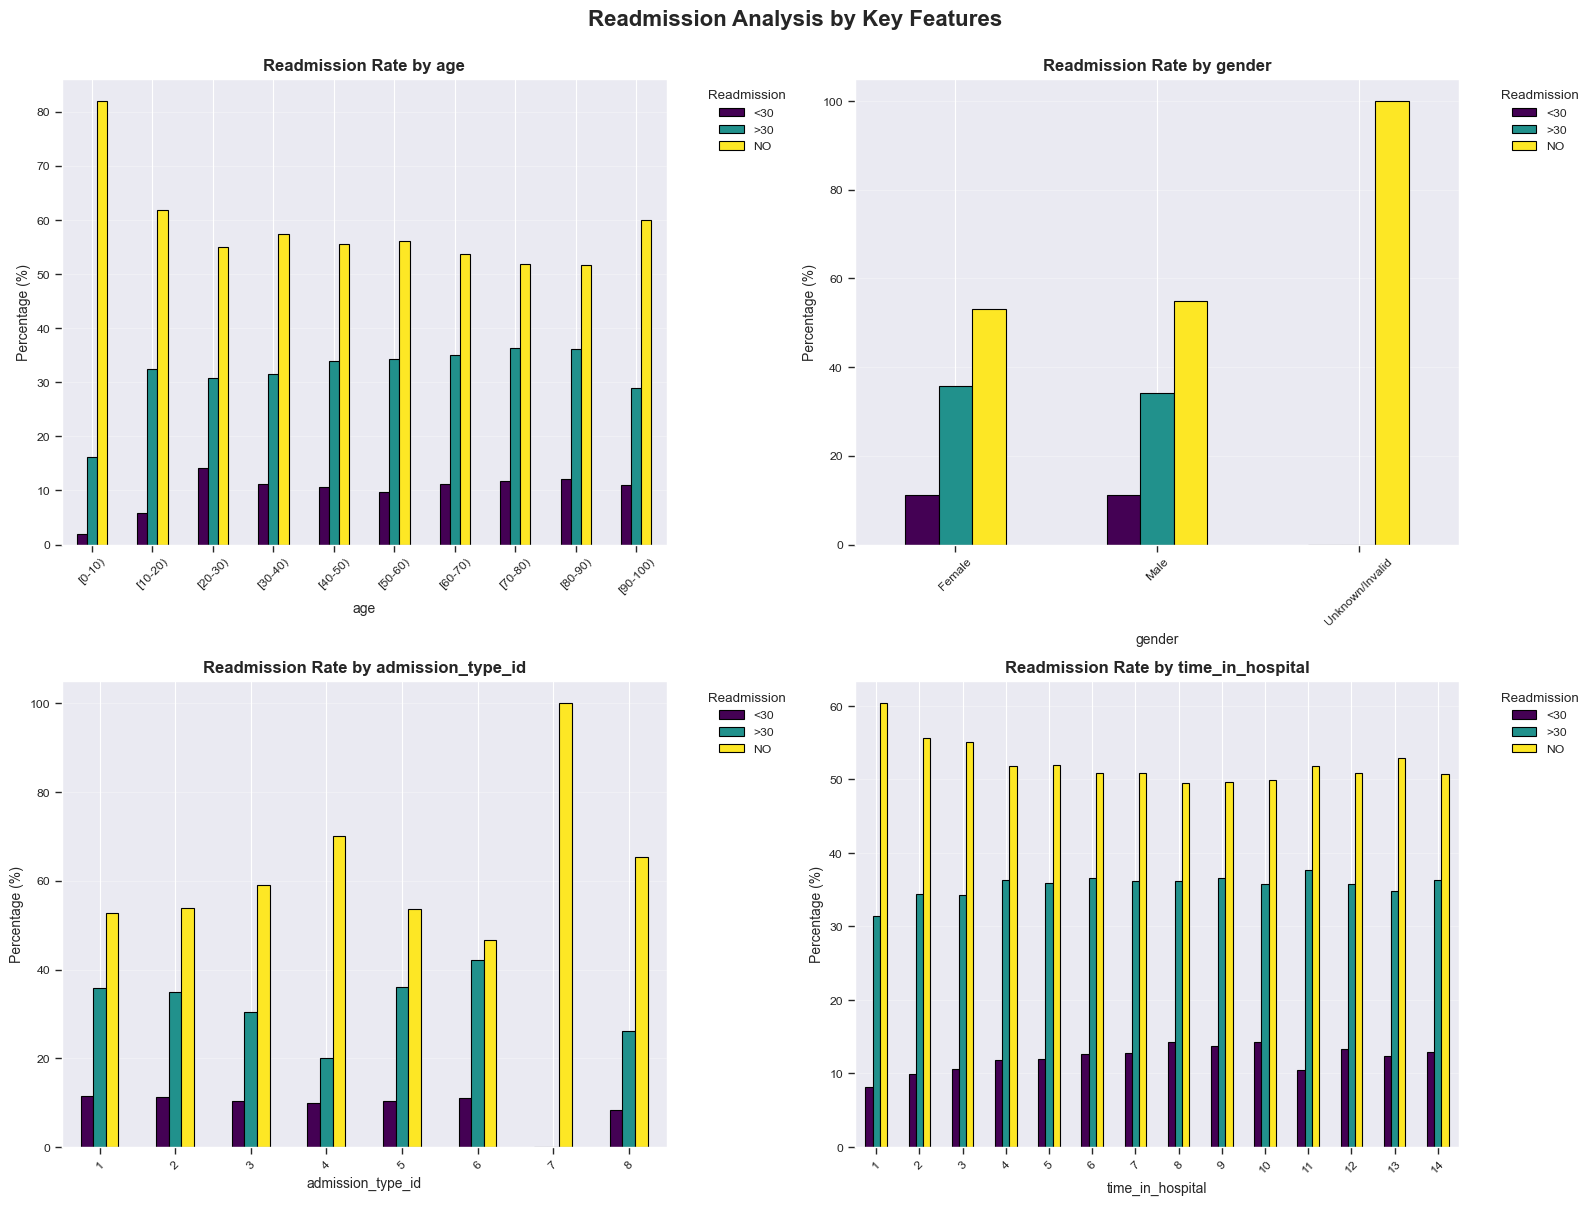

✅ Figure saved: reports/figures/readmission_by_features.png


In [62]:
# Analyze readmission rates by key features
key_features = ['age', 'gender', 'admission_type_id', 'time_in_hospital']

# Filter features that exist in the dataset
key_features = [f for f in key_features if f in df.columns]

if len(key_features) > 0:
    n_features = len(key_features)
    n_cols = 2
    n_rows = int(np.ceil(n_features / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*6))
    axes = axes.flatten() if n_rows > 1 else axes

    for idx, feature in enumerate(key_features):
        ax = axes[idx]
        
        # Create crosstab
        ct = pd.crosstab(df[feature], df[target_col], normalize='index') * 100
        ct.plot(kind='bar', ax=ax, stacked=False, colormap='viridis', edgecolor='black')
        
        ax.set_title(f'Readmission Rate by {feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Percentage (%)', fontsize=10)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title='Readmission', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Readmission Analysis by Key Features', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('reports/figures/readmission_by_features.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Figure saved: reports/figures/readmission_by_features.png")

## 12. Outlier Detection Preview

In [63]:
# Quick outlier detection using IQR method for key numerical features
key_numerical = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                 'num_medications', 'number_diagnoses']
key_numerical = [f for f in key_numerical if f in numerical_cols]

if len(key_numerical) > 0:
    print("Outlier Detection (IQR Method) for Key Features:\n")
    print(f"{'Feature':<25s} {'Q1':>10s} {'Q3':>10s} {'IQR':>10s} {'Lower':>10s} {'Upper':>10s} {'Outliers':>10s}")
    print("="*95)
    
    outlier_info = {}
    
    for col in key_numerical:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        n_outliers = len(outliers)
        
        outlier_info[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'n_outliers': n_outliers,
            'pct_outliers': n_outliers / len(df) * 100
        }
        
        print(f"{col:<25s} {Q1:>10.2f} {Q3:>10.2f} {IQR:>10.2f} {lower_bound:>10.2f} {upper_bound:>10.2f} {n_outliers:>10d}")

Outlier Detection (IQR Method) for Key Features:

Feature                           Q1         Q3        IQR      Lower      Upper   Outliers
time_in_hospital                2.00       6.00       4.00      -4.00      12.00       2252
num_lab_procedures             31.00      57.00      26.00      -8.00      96.00        143
num_procedures                  0.00       2.00       2.00      -3.00       5.00       4954
num_medications                10.00      20.00      10.00      -5.00      35.00       2557
number_diagnoses                6.00       9.00       3.00       1.50      13.50        281


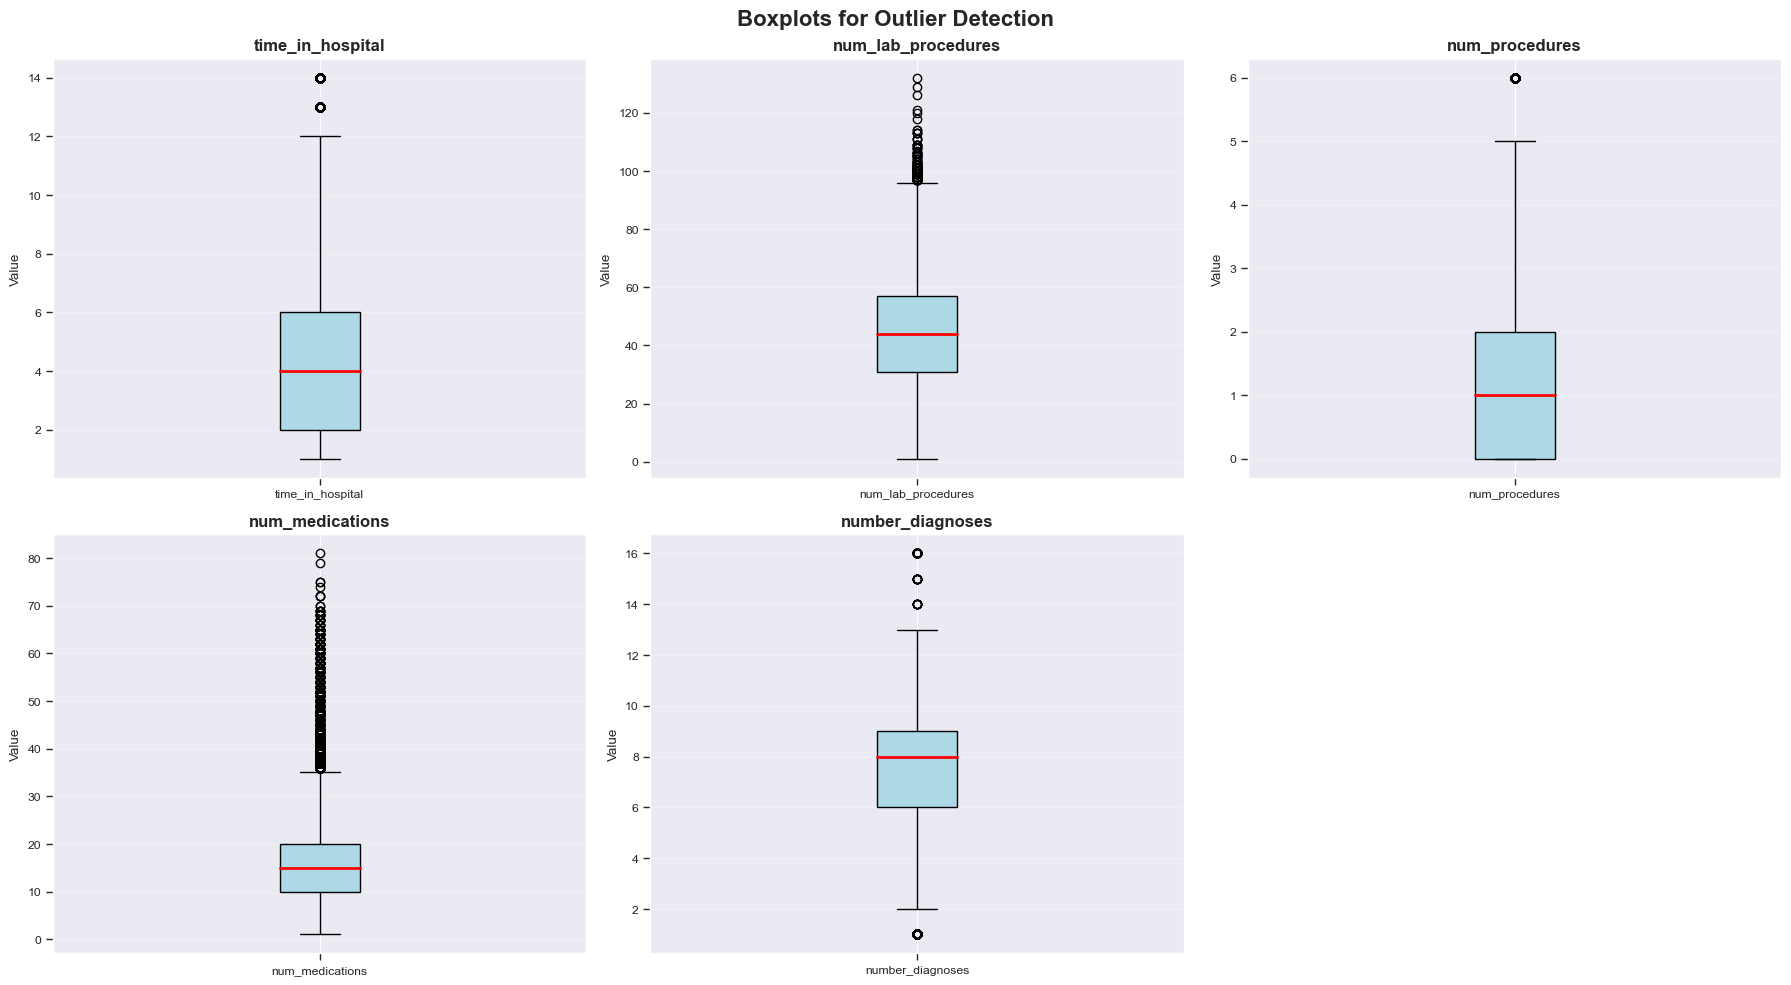

✅ Figure saved: reports/figures/outlier_boxplots.png


In [64]:
# Visualize boxplots for outlier detection
if len(key_numerical) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(key_numerical[:6]):
        ax = axes[idx]
        df.boxplot(column=col, ax=ax, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='black'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'))
        
        ax.set_title(f'{col}', fontsize=12, fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(axis='y', alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(key_numerical[:6]), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Boxplots for Outlier Detection', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('reports/figures/outlier_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Figure saved: reports/figures/outlier_boxplots.png")

## 13. Summary Statistics Export

In [65]:
# Create comprehensive summary report
summary = {
    'dataset_info': {
        'shape': df.shape,
        'total_patients': int(df.shape[0]),
        'total_features': int(df.shape[1]),
        'numerical_features': len(numerical_cols),
        'categorical_features': len(categorical_cols),
        'missing_values_count': int(df.isnull().sum().sum()),
        'duplicate_rows': int(df.duplicated().sum()),
        'memory_usage_mb': float(df.memory_usage(deep=True).sum() / 1024**2)
    },
    'target_distribution': df[target_col].value_counts().to_dict(),
    'missing_values': {k: float(v) for k, v in missing_cols.items()} if missing_cols else {},
    'high_cardinality_features': {k: int(v) for k, v in high_card.items()} if high_card else {},
    'numerical_features': numerical_cols,
    'categorical_features': categorical_cols,
    'medication_columns': medication_cols
}

# Save summary to JSON
with open('reports/eda_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"\nDataset Shape: {summary['dataset_info']['total_patients']:,} rows × {summary['dataset_info']['total_features']} columns")
print(f"Numerical Features: {summary['dataset_info']['numerical_features']}")
print(f"Categorical Features: {summary['dataset_info']['categorical_features']}")
print(f"Missing Values: {summary['dataset_info']['missing_values_count']:,}")
print(f"Duplicate Rows: {summary['dataset_info']['duplicate_rows']:,}")
print(f"Memory Usage: {summary['dataset_info']['memory_usage_mb']:.2f} MB")

print(f"\nTarget Distribution ({target_col}):")
for key, value in summary['target_distribution'].items():
    pct = value / summary['dataset_info']['total_patients'] * 100
    print(f"  {key}: {value:,} ({pct:.2f}%)")

print("\n✅ EDA Complete!")
print("📄 Summary saved to: reports/eda_summary.json")
print("📊 Figures saved to: reports/figures/")


FINAL SUMMARY

Dataset Shape: 101,766 rows × 50 columns
Numerical Features: 9
Categorical Features: 37
Missing Values: 181,168
Duplicate Rows: 0
Memory Usage: 220.22 MB

Target Distribution (readmitted):
  NO: 54,864 (53.91%)
  >30: 35,545 (34.93%)
  <30: 11,357 (11.16%)

✅ EDA Complete!
📄 Summary saved to: reports/eda_summary.json
📊 Figures saved to: reports/figures/


## 14. Key Insights and Observations

In [66]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM EDA")
print("="*70)

insights = []

# Insight 1: Dataset size
insights.append(f"1. Large-scale dataset with {df.shape[0]:,} patient encounters")

# Insight 2: Missing values
if len(missing_cols) > 0:
    high_missing = [k for k, v in missing_cols.items() if v > 40]
    if high_missing:
        insights.append(f"2. High missing values (>40%) in: {', '.join(high_missing[:3])}")
    else:
        insights.append(f"2. Moderate missing values in {len(missing_cols)} columns")
else:
    insights.append("2. No missing values - clean dataset")

# Insight 3: Target imbalance
target_dist = df[target_col].value_counts(normalize=True)
max_class_pct = target_dist.max() * 100
if max_class_pct > 60:
    insights.append(f"3. Imbalanced target variable - majority class: {max_class_pct:.1f}%")
else:
    insights.append(f"3. Relatively balanced target variable")

# Insight 4: Feature diversity
insights.append(f"4. Rich feature set: {len(numerical_cols)} numerical + {len(categorical_cols)} categorical")

# Insight 5: High cardinality
if len(high_card) > 0:
    insights.append(f"5. {len(high_card)} high-cardinality features require special encoding")

# Insight 6: Correlation
if len(high_corr_pairs) > 0:
    insights.append(f"6. {len(high_corr_pairs)} highly correlated pairs - potential multicollinearity")
else:
    insights.append(f"6. No strong multicollinearity detected")

# Print insights
for insight in insights:
    print(f"\n{insight}")

print("\n" + "="*70)


KEY INSIGHTS FROM EDA

1. Large-scale dataset with 101,766 patient encounters

2. High missing values (>40%) in: max_glu_serum, A1Cresult

3. Relatively balanced target variable

4. Rich feature set: 9 numerical + 37 categorical

5. 5 high-cardinality features require special encoding

6. No strong multicollinearity detected



## 15. Next Steps and Recommendations

In [67]:
print("\n" + "="*70)
print("NEXT STEPS AND RECOMMENDATIONS")
print("="*70)

recommendations = [
    "1. Data Preprocessing:",
    "   - Handle missing values (weight, payer_code, medical_specialty)",
    "   - Strategy: Drop high-missing columns (>50%), impute others",
    "   - Consider missing value patterns as features",
    "",
    "2. Feature Engineering:",
    "   - Create comorbidity scores from diagnoses",
    "   - Aggregate medication patterns",
    "   - Derive poly-pharmacy indicators",
    "   - Create hospital utilization scores",
    "",
    "3. Encoding Strategy:",
    "   - One-hot encoding for low cardinality (<10 categories)",
    "   - Target encoding for high cardinality (>10 categories)",
    "   - Ordinal encoding for age groups",
    "",
    "4. Feature Scaling:",
    "   - StandardScaler for clinical features",
    "   - MinMaxScaler for count-based features",
    "   - RobustScaler for outlier-prone features",
    "",
    "5. Outlier Handling:",
    "   - Keep outliers (medical validity)",
    "   - Use RobustScaler to minimize impact",
    "   - Consider outlier flags as features",
    "",
    "6. Feature Selection:",
    "   - Remove low-variance features",
    "   - Handle multicollinearity (VIF analysis)",
    "   - Domain-driven feature importance",
    "",
    "7. Data Splitting:",
    "   - Stratified split by readmission status",
    "   - 70% train / 15% validation / 15% test",
    "   - Ensure no patient overlap across splits",
    "",
    "8. Baseline Experiments:",
    "   - K-Means (k=3-8)",
    "   - DBSCAN (auto-eps)",
    "   - Hierarchical (Ward linkage)",
    "   - GMM (BIC selection)",
    "",
    "9. MLflow Tracking:",
    "   - Log all preprocessing steps",
    "   - Track feature engineering decisions",
    "   - Version control data transformations"
]

for rec in recommendations:
    print(rec)

print("\n" + "="*70)
print("\n📌 Next Notebook: 02_preprocessing.ipynb")
print("🎯 Goal: Transform raw data into clustering-ready features\n")


NEXT STEPS AND RECOMMENDATIONS
1. Data Preprocessing:
   - Handle missing values (weight, payer_code, medical_specialty)
   - Strategy: Drop high-missing columns (>50%), impute others
   - Consider missing value patterns as features

2. Feature Engineering:
   - Create comorbidity scores from diagnoses
   - Aggregate medication patterns
   - Derive poly-pharmacy indicators
   - Create hospital utilization scores

3. Encoding Strategy:
   - One-hot encoding for low cardinality (<10 categories)
   - Target encoding for high cardinality (>10 categories)
   - Ordinal encoding for age groups

4. Feature Scaling:
   - StandardScaler for clinical features
   - MinMaxScaler for count-based features
   - RobustScaler for outlier-prone features

5. Outlier Handling:
   - Keep outliers (medical validity)
   - Use RobustScaler to minimize impact
   - Consider outlier flags as features

6. Feature Selection:
   - Remove low-variance features
   - Handle multicollinearity (VIF analysis)
   - Domain

## 16. Log to MLflow (Optional)

In [68]:
# Optional: Log EDA summary to MLflow
try:
    mlflow_manager = MLflowManager()
    
    with mlflow_manager.start_run(run_name="eda_summary", tags={"stage": "eda"}):
        # Log dataset statistics as parameters
        mlflow_manager.log_params({
            "total_samples": summary['dataset_info']['total_patients'],
            "total_features": summary['dataset_info']['total_features'],
            "numerical_features": summary['dataset_info']['numerical_features'],
            "categorical_features": summary['dataset_info']['categorical_features'],
            "missing_values": summary['dataset_info']['missing_values_count'],
            "duplicate_rows": summary['dataset_info']['duplicate_rows']
        })
        
        # Log summary as artifact
        mlflow_manager.log_dict(summary, "eda_summary.json")
        
        # Log figures
        figures_dir = Path('reports/figures')
        for fig_path in figures_dir.glob('*.png'):
            mlflow_manager.log_artifact(str(fig_path), "figures")
        
        mlflow_manager.end_run()
        
    print("\n✅ EDA summary logged to MLflow")
    print("📊 View experiments: mlflow ui --backend-store-uri experiments/mlruns")
    
except Exception as e:
    print(f"\n⚠️  MLflow logging skipped: {e}")
    print("You can log manually later if needed")

INFO:src.utils.mlflow_utils:Created new experiment: diabetes_clustering
INFO:src.utils.mlflow_utils:Started MLflow run: eda_summary
INFO:src.utils.mlflow_utils:Logged 6 parameters
INFO:src.utils.mlflow_utils:Logged dictionary: eda_summary.json
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/readmission_by_features.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/categorical_distributions.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/medication_usage.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/correlation_matrix.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/target_distribution.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/missing_values.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/age_distribution.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/numerical_distributions.png
INFO:src.utils.mlflow_utils:Logged artifact: reports/figures/outlier_boxpl


✅ EDA summary logged to MLflow
📊 View experiments: mlflow ui --backend-store-uri experiments/mlruns


---

## ✅ EDA Completed

**Deliverables:**
- Comprehensive dataset understanding
- 8+ visualization figures saved
- Summary statistics exported
- Key insights identified
- Preprocessing recommendations

**Next Steps:**
1. Proceed to `02_preprocessing.ipynb`
2. Implement data cleaning and feature engineering
3. Prepare data for clustering experiments

---